<a href="https://colab.research.google.com/github/jieun0441/XMC/blob/main/Code_for_Extended_data_Fig_6_SI_Fig_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Cell 1] Loaded populations for 426 dongs.
[Cell 1] Totals:
 - Households total     : 4,463,385
 - Registered pop total : 9,668,008
 - De facto pop total   : 10,446,532


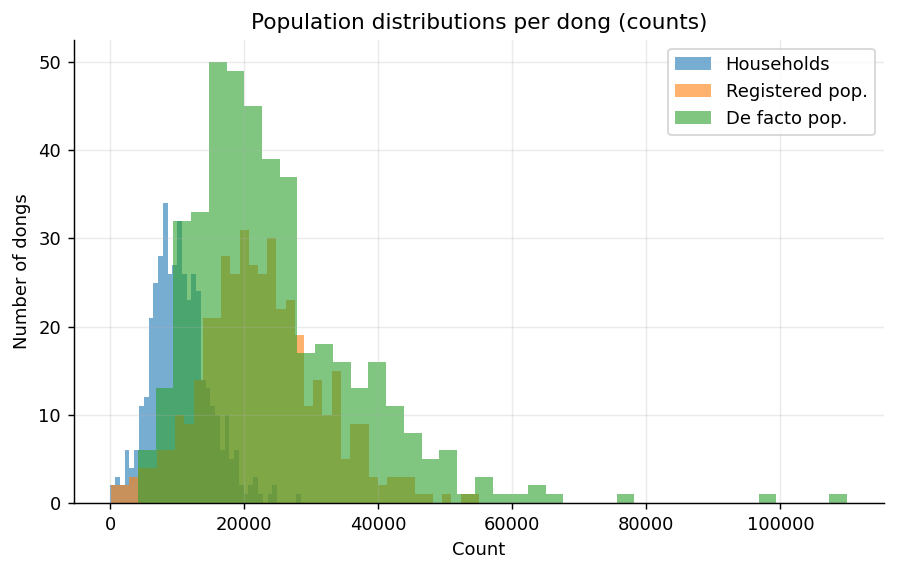

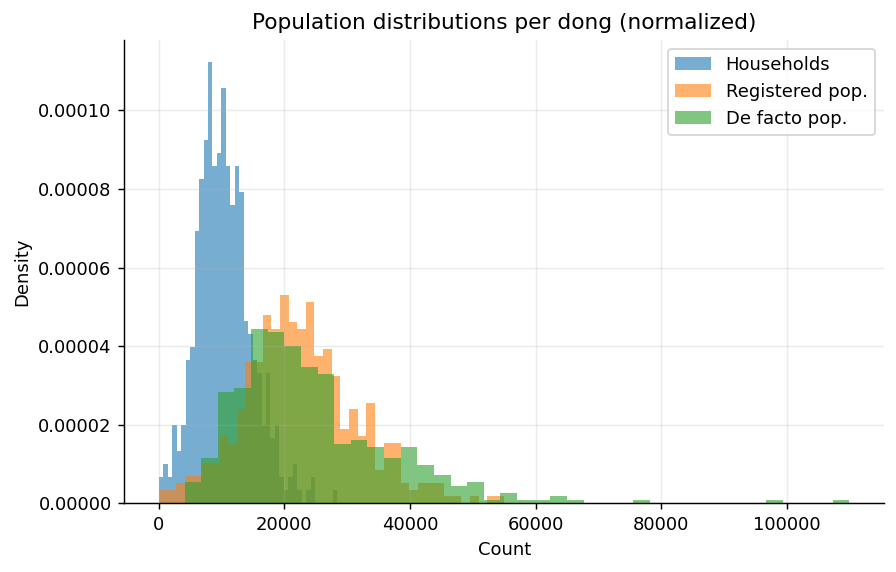

In [2]:
# ============================================
# Cell 1 — Load populations and plot histograms (counts + normalized)
# Files:
#   - population_Seoul_426dong_2023.xlsx  (Sheet1)
# Columns:
#   dong_cd, household, regist_pop, defacto_pop
# Notes:
#   - We'll mainly use 'defacto_pop' downstream.
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------- Config -----------
data_dir = "/content/drive/MyDrive/FMC_Data/Sharing_to_Public"
pop_file = os.path.join(data_dir, "population_Seoul_426dong_2023.xlsx")
pop_sheet = "Sheet1"

# Matplotlib defaults
plt.rcParams.update({
    "figure.dpi": 130,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "font.size": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# ----------- Load -----------
df_pop = pd.read_excel(pop_file, sheet_name=pop_sheet, engine="openpyxl")

# Standardize column names and types
df_pop = df_pop.rename(columns={
    "dong_cd": "dong_cd",
    "household": "household",
    "regist_pop": "regist_pop",
    "defacto_pop": "defacto_pop"
})
# Ensure IDs are strings (important for merges)
df_pop["dong_cd"] = df_pop["dong_cd"].astype(str)

# Basic sanity checks
assert {"dong_cd", "household", "regist_pop", "defacto_pop"}.issubset(df_pop.columns)
n_dong = df_pop["dong_cd"].nunique()
print(f"[Cell 1] Loaded populations for {n_dong} dongs.")

# ----------- Totals (requested) -----------
tot_households = float(df_pop["household"].sum())      # [NEW]
tot_regist     = float(df_pop["regist_pop"].sum())     # [NEW]
tot_defacto    = float(df_pop["defacto_pop"].sum())    # [NEW]

print("[Cell 1] Totals:")                               # [NEW]
print(f" - Households total     : {tot_households:,.0f}")  # [NEW]
print(f" - Registered pop total : {tot_regist:,.0f}")      # [NEW]
print(f" - De facto pop total   : {tot_defacto:,.0f}")     # [NEW]

# ----------- Histograms (counts) -----------
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
bins = 40

ax.hist(df_pop["household"].dropna().values, bins=bins, alpha=0.6, label="Households")
ax.hist(df_pop["regist_pop"].dropna().values, bins=bins, alpha=0.6, label="Registered pop.")
ax.hist(df_pop["defacto_pop"].dropna().values, bins=bins, alpha=0.6, label="De facto pop.")

ax.set_xlabel("Count")
ax.set_ylabel("Number of dongs")
ax.set_title("Population distributions per dong (counts)")
ax.legend()
plt.tight_layout()
plt.show()

# ----------- Histograms (normalized densities) -----------
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))         # [NEW]
ax.hist(df_pop["household"].dropna().values, bins=bins, alpha=0.6, density=True, label="Households")   # [NEW]
ax.hist(df_pop["regist_pop"].dropna().values, bins=bins, alpha=0.6, density=True, label="Registered pop.")  # [NEW]
ax.hist(df_pop["defacto_pop"].dropna().values, bins=bins, alpha=0.6, density=True, label="De facto pop.")   # [NEW]
ax.set_xlabel("Count")                                  # [NEW]
ax.set_ylabel("Density")                                # [NEW]
ax.set_title("Population distributions per dong (normalized)")  # [NEW]
ax.legend()                                             # [NEW]
plt.tight_layout()                                      # [NEW]
plt.show()                                              # [NEW]


[Cell 2] Loaded distance tables:
 - same=0          : (181476, 3)
 - same=radius     : (181476, 3)
 - without sameOD  : (181050, 3)


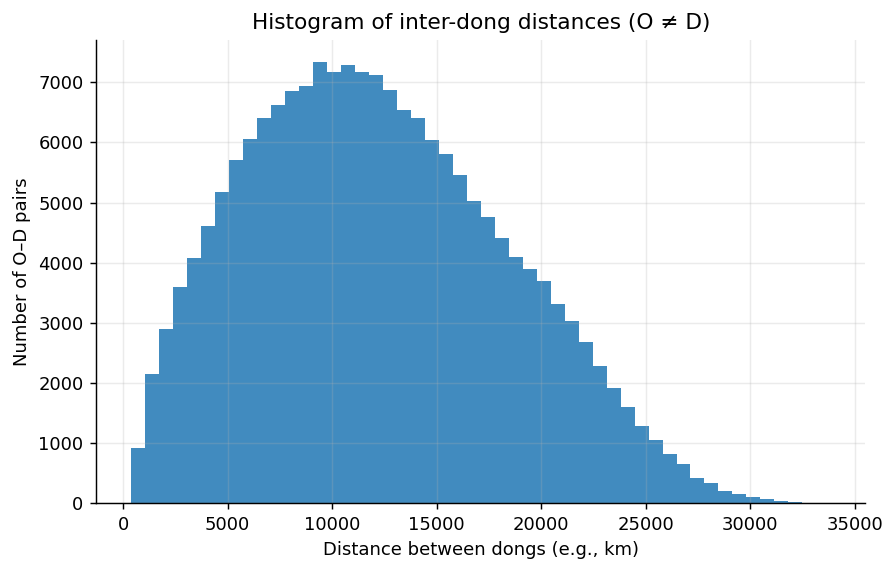

In [3]:
# ============================================
# Cell 2 — Load distance matrices; histogram of inter-dong distances
# Files:
# - Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_if_same_filled_zero.csv
# - Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_if_same_filled_radius_assuming_circle.csv
# - Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_without_sameOD
#
# We will keep all three; for the histogram, we use the "radius_if_same" file
# and EXCLUDE self pairs (O != D).
# Columns: O_ADMDONG_CD, D_ADMDONG_CD, Distance
# ============================================

dist_zero_file = os.path.join(
    data_dir,
    "Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_if_same_filled_zero.csv"
)
dist_radius_file = os.path.join(
    data_dir,
    "Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_if_same_filled_radius_assuming_circle.csv"
)
dist_wo_same_file = os.path.join(
    data_dir,
    "Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_without_sameOD"
)

usecols = ["O_ADMDONG_CD", "D_ADMDONG_CD", "Distance"]
dtype_ids = {"O_ADMDONG_CD": str, "D_ADMDONG_CD": str}

df_dist_zero   = pd.read_csv(dist_zero_file, usecols=usecols, dtype=dtype_ids)
df_dist_radius = pd.read_csv(dist_radius_file, usecols=usecols, dtype=dtype_ids)
# The third file may or may not have an extension; try to read flexibly
try:
    df_dist_wo_same = pd.read_csv(dist_wo_same_file, usecols=usecols, dtype=dtype_ids)
except Exception:
    # try with .csv appended
    try:
        df_dist_wo_same = pd.read_csv(dist_wo_same_file + ".csv", usecols=usecols, dtype=dtype_ids)
    except Exception as e:
        print(f"[Cell 2] Could not load without_sameOD file directly: {e}")
        df_dist_wo_same = None

print(f"[Cell 2] Loaded distance tables:")
print(f" - same=0          : {df_dist_zero.shape}")
print(f" - same=radius     : {df_dist_radius.shape}")
print(f" - without sameOD  : {None if df_dist_wo_same is None else df_dist_wo_same.shape}")

# Histogram of distances BETWEEN DIFFERENT dongs from the radius file
mask_inter = df_dist_radius["O_ADMDONG_CD"] != df_dist_radius["D_ADMDONG_CD"]
distvals = df_dist_radius.loc[mask_inter, "Distance"].astype(float).values

plt.figure(figsize=(7, 4.5))
plt.hist(distvals, bins=50, alpha=0.85)
plt.xlabel("Distance between dongs (e.g., km)")
plt.ylabel("Number of O–D pairs")
plt.title("Histogram of inter-dong distances (O ≠ D)")
plt.tight_layout()
plt.show()

# For later use, keep a fast distance pivot/matrix with same=radius
# Build index order from population table to keep consistent ordering
dong_ids = df_pop["dong_cd"].tolist()
id_to_idx = {d: i for i, d in enumerate(dong_ids)}
n = len(dong_ids)

# Initialize full distance matrix with NaN
dist_matrix = np.full((n, n), np.nan, dtype=float)
for _, row in df_dist_radius.iterrows():
    i = id_to_idx.get(row["O_ADMDONG_CD"])
    j = id_to_idx.get(row["D_ADMDONG_CD"])
    if i is not None and j is not None:
        dist_matrix[i, j] = float(row["Distance"])

# Sanity: self distances should be positive radii in the radius file
self_radii = np.diag(dist_matrix)
if np.any(~np.isfinite(self_radii)) or np.any(self_radii <= 0):
    print("[Cell 2][WARN] Some self distances (radii) missing or non-positive. Check input.")


[Cell 3] Trips loaded: non-work (181476, 3), work (176385, 3)


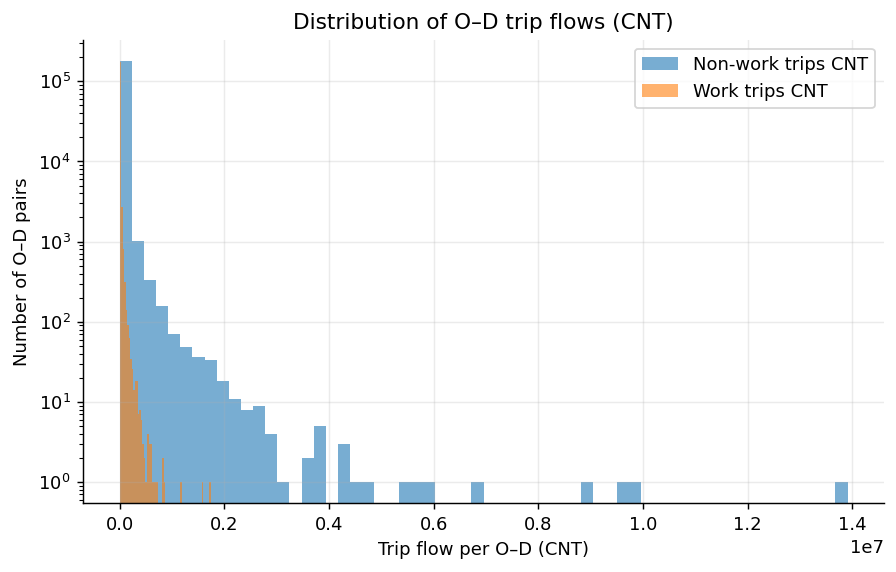

[Cell 3] Example rows (SC/PE):


,dong_cd,SC_nw,SC_w,PE_nw,PE_w,OT_nw,IT_nw,OT_w,IT_w,defacto_pop
0,11110530,0.154321,0.264450,0.005198,0.008677,10335822.82,12896501.83,1181525.98,6015553.54,25469
1,11110540,0.080506,0.126065,0.001307,0.000918,2604562.08,3242548.04,215030.94,636115.02,5994
2,11110550,0.190363,0.092707,0.001335,0.000700,3298781.23,3311255.99,673312.93,485608.84,14177
3,11110560,0.199397,0.097820,0.001455,0.000820,4585172.62,3609338.72,1123151.65,568389.02,17816
4,11110570,0.089620,0.054232,0.000559,0.000361,1697658.10,1387913.98,493042.30,250310.27,6693


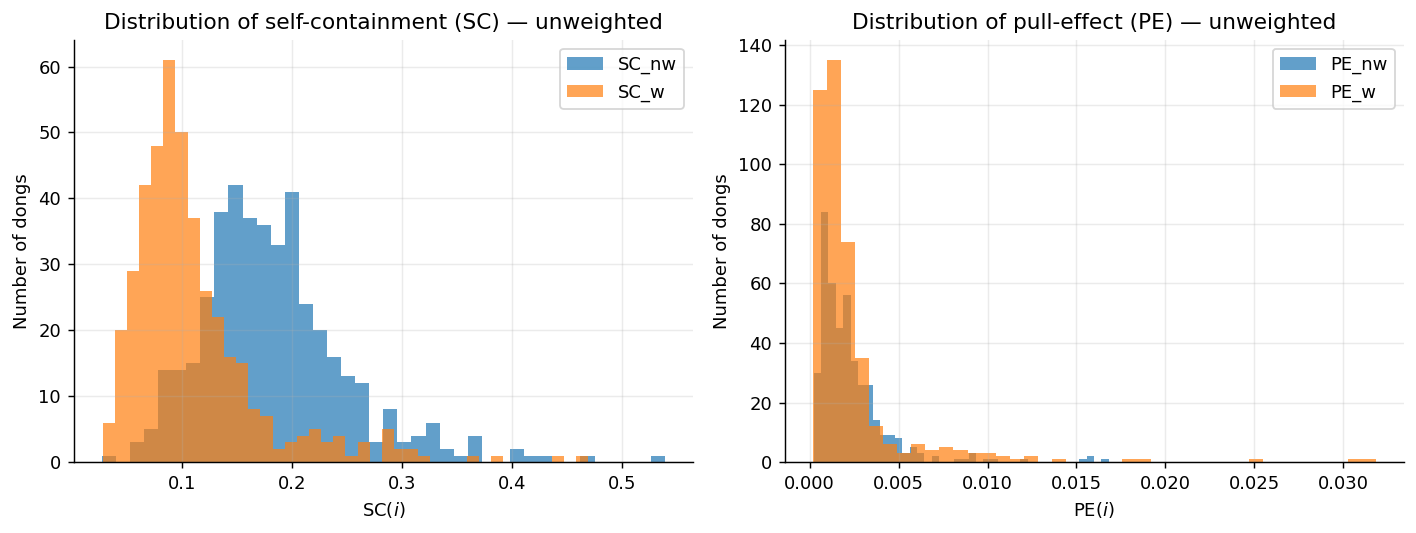

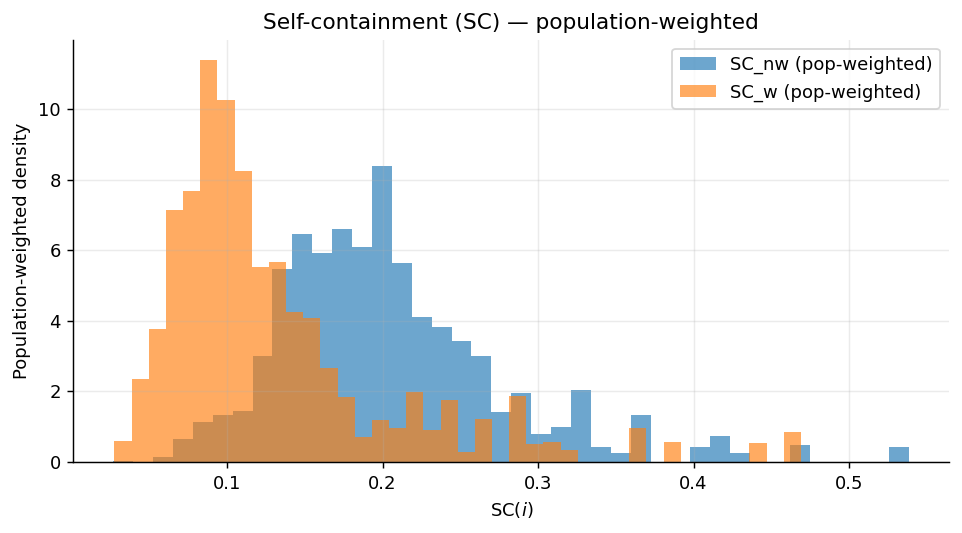

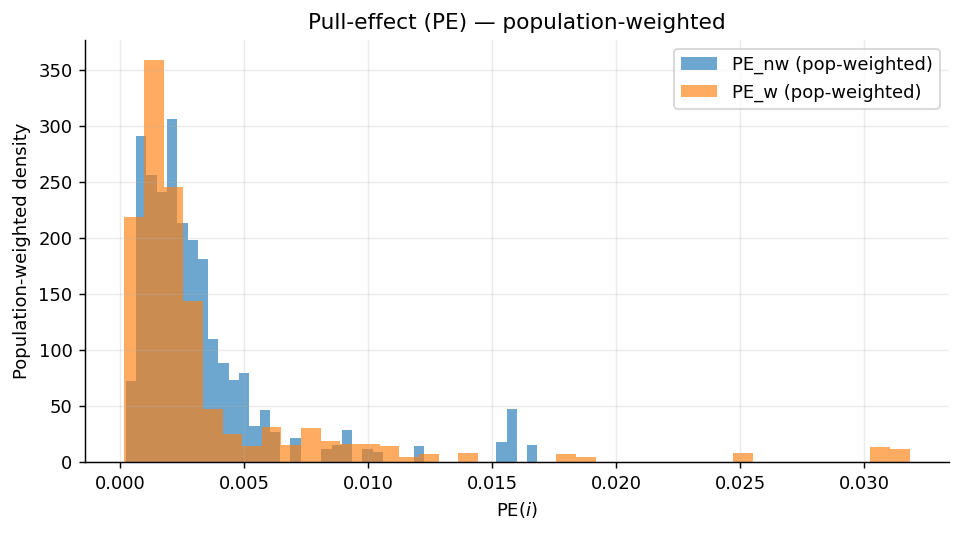

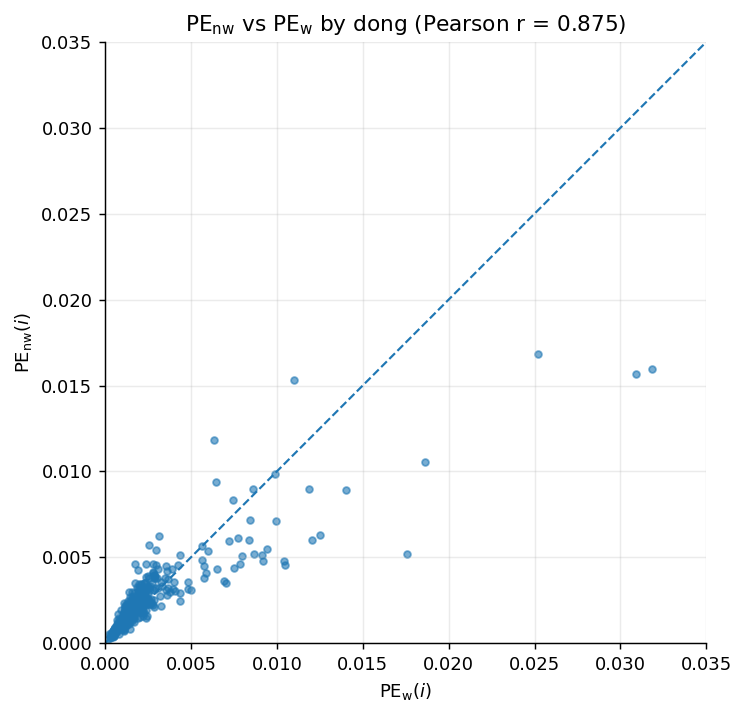

[Cell 3] Fraction of dongs with PE_nw(i) < PE_w(i):
 - Unweighted (per dong):          24.883%
 - Pop-weighted (per resident):    29.615%
 - Trip-weighted (work arrivals):  51.994%
 - Trip-weighted (nonwork arrivals): 34.834%

[Cell 3] PE_w - PE_nw statistics:
 - mean (unweighted): -0.000000
 - median (unweighted): -0.000218
 - mean (pop-weighted): 0.000357
 - q05/q50/q95 (pop-weighted): -0.001626, -0.000283, 0.004938

[Cell 3] Correlations between PE_w and PE_nw:
 - Pearson r:  0.875
 - Spearman ρ: 0.935

[Cell 3] Distribution distances (between PE_nw and PE_w):
 - Jensen–Shannon divergence: 0.020950 nats
 - Hellinger distance:        0.145380
 - Cosine similarity:         0.908380

[Cell 3] Top 10 dongs where PE_w > PE_nw (largest positive diff):
 - 11560540: diff=+0.015883, PE_w=0.031827, PE_nw=0.015944, pop=97394
 - 11680640: diff=+0.015217, PE_w=0.030909, PE_nw=0.015692, pop=109974
 - 11545510: diff=+0.012422, PE_w=0.017585, PE_nw=0.005163, pop=62283
 - 11110615: diff=+0.008375, P

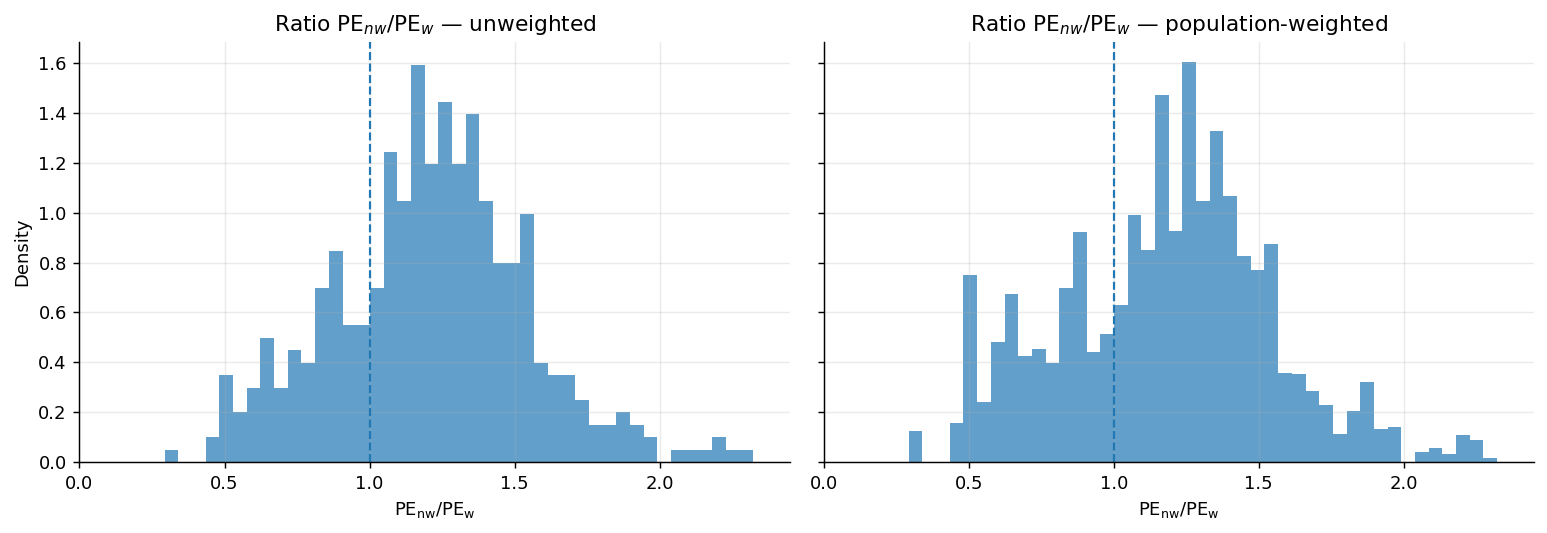

In [4]:
# ============================================
# Cell 3 — Load trip datasets, plot histograms, compute SC and PE
# Files:
#  - Tij_NonworkTrips_P24567_in2023.xlsx  (columns: O_ADMDONG_CD, D_ADMDONG_CD, CNT)
#  - Tij_P1_Going_to_Work_in2023.xlsx     (columns: O_ADMDONG_CD, D_ADMDONG_CD, CNT)
#
# Definitions:
#   SC(i) = T_ii / sum_j T_ij   (per origin i)
#   PE(i) = sum_j T_ji / sum_{m,n} T_{mn}  (incoming share to i)
#
# Includes:
#   - CNT histograms (non-work & work)
#   - Dense T matrices (aligned to dong_ids from Cell 2/1)
#   - SC/PE per dong + distributions (unweighted & pop-weighted)
#   - Scatter of PE_nw vs PE_w
#   - Fractions and summary comparisons between PE_nw and PE_w
#   - Histogram(s) of the ratio r = PE_nw / PE_w (unweighted & pop-weighted)
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

nw_file = os.path.join(data_dir, "Tij_NonworkTrips_P24567_in2023.xlsx")
w_file  = os.path.join(data_dir, "Tij_P1_Going_to_Work_in2023.xlsx")

usecols_t = ["O_ADMDONG_CD", "D_ADMDONG_CD", "CNT"]
df_T_nw = pd.read_excel(nw_file, usecols=usecols_t, engine="openpyxl")
df_T_w  = pd.read_excel(w_file , usecols=usecols_t, engine="openpyxl")

# Standardize types
for dfT in (df_T_nw, df_T_w):
    dfT["O_ADMDONG_CD"] = dfT["O_ADMDONG_CD"].astype(str)
    dfT["D_ADMDONG_CD"] = dfT["D_ADMDONG_CD"].astype(str)
    dfT["CNT"] = pd.to_numeric(dfT["CNT"], errors="coerce").fillna(0.0)

print(f"[Cell 3] Trips loaded: non-work {df_T_nw.shape}, work {df_T_w.shape}")

# Histogram of CNT values (same axes)
plt.figure(figsize=(7, 4.5))
plt.hist(df_T_nw["CNT"].values, bins=60, alpha=0.6, label="Non-work trips CNT")
plt.hist(df_T_w["CNT"].values,  bins=60, alpha=0.6, label="Work trips CNT")
plt.xlabel("Trip flow per O–D (CNT)")
plt.ylabel("Number of O–D pairs")
plt.title("Distribution of O–D trip flows (CNT)")
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

# ----- Build dense T matrices in the consistent dong order -----
def build_dense_T(dfT, dong_ids):
    """Return dense matrix T (n x n) in order of dong_ids."""
    idx_map = {d: i for i, d in enumerate(dong_ids)}
    n = len(dong_ids)
    T = np.zeros((n, n), dtype=float)
    for (o, d), cnt in dfT.groupby(["O_ADMDONG_CD", "D_ADMDONG_CD"])["CNT"].sum().items():
        i = idx_map.get(o); j = idx_map.get(d)
        if i is not None and j is not None:
            T[i, j] = float(cnt)
    return T

T_nw = build_dense_T(df_T_nw, dong_ids)
T_w  = build_dense_T(df_T_w,  dong_ids)

# ----- SC and PE -----
def compute_SC(T):
    """SC(i) = T_ii / sum_j T_ij; 0 if OT(i)=0."""
    OT = T.sum(axis=1)  # outgoing
    diag = np.diag(T)
    with np.errstate(divide="ignore", invalid="ignore"):
        SC = np.where(OT > 0, diag / OT, 0.0)
    return SC, OT

def compute_PE(T):
    """PE(i) = sum_j T_ji / sum_{m,n} T_{mn}."""
    total = T.sum()
    IT = T.sum(axis=0)  # incoming per destination i
    with np.errstate(divide="ignore", invalid="ignore"):
        PE = np.where(total > 0, IT / total, 0.0)
    return PE, IT, total

SC_nw, OT_nw = compute_SC(T_nw)
SC_w , OT_w  = compute_SC(T_w)
PE_nw, IT_nw, total_nw = compute_PE(T_nw)
PE_w , IT_w , total_w  = compute_PE(T_w)

# Assemble per-dong frame for later reuse
df_SC_PE = pd.DataFrame({
    "dong_cd": dong_ids,
    "SC_nw": SC_nw,
    "SC_w": SC_w,
    "PE_nw": PE_nw,
    "PE_w": PE_w,
    "OT_nw": OT_nw,
    "IT_nw": IT_nw,
    "OT_w": OT_w,
    "IT_w": IT_w
})

# Attach de facto population (for weighting)
df_SC_PE = df_SC_PE.merge(
    df_pop[["dong_cd", "defacto_pop"]],
    on="dong_cd", how="left"
)
pop_ordered = df_SC_PE["defacto_pop"].astype(float).to_numpy()
pop_ordered = np.where(np.isfinite(pop_ordered) & (pop_ordered > 0), pop_ordered, 0.0)
tot_pop = pop_ordered.sum()
if tot_pop <= 0:
    print("[Cell 3][WARN] All de facto populations are zero/NaN; population-weighted plots will equal unweighted.")

print("[Cell 3] Example rows (SC/PE):")
display(df_SC_PE.head())

# ----- Unweighted distributions of SC and PE (SI Fig. 1)-----
fig, axs = plt.subplots(1, 2, figsize=(11, 4.2))
axs[0].hist(SC_nw, bins=40, alpha=0.7, label="SC_nw")
axs[0].hist(SC_w , bins=40, alpha=0.7, label="SC_w")
axs[0].set_xlabel(r"$\mathrm{SC}(i)$")
axs[0].set_ylabel("Number of dongs")
axs[0].set_title("Distribution of self-containment (SC) — unweighted")
axs[0].legend()

axs[1].hist(PE_nw, bins=40, alpha=0.7, label="PE_nw")
axs[1].hist(PE_w , bins=40, alpha=0.7, label="PE_w")
axs[1].set_xlabel(r"$\mathrm{PE}(i)$")
axs[1].set_ylabel("Number of dongs")
axs[1].set_title("Distribution of pull-effect (PE) — unweighted")
axs[1].legend()

plt.tight_layout()
plt.show()

# ----- Population-weighted distributions of SC and PE -----
if tot_pop > 0:
    # SC (weighted)
    fig, ax = plt.subplots(1, 1, figsize=(7.5, 4.2))
    ax.hist(SC_nw, bins=40, density=True, weights=pop_ordered, alpha=0.65, label="SC_nw (pop-weighted)")
    ax.hist(SC_w , bins=40, density=True, weights=pop_ordered, alpha=0.65, label="SC_w (pop-weighted)")
    ax.set_xlabel(r"$\mathrm{SC}(i)$")
    ax.set_ylabel("Population-weighted density")
    ax.set_title("Self-containment (SC) — population-weighted")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # PE (weighted)
    fig, ax = plt.subplots(1, 1, figsize=(7.5, 4.2))
    ax.hist(PE_nw, bins=40, density=True, weights=pop_ordered, alpha=0.65, label="PE_nw (pop-weighted)")
    ax.hist(PE_w , bins=40, density=True, weights=pop_ordered, alpha=0.65, label="PE_w (pop-weighted)")
    ax.set_xlabel(r"$\mathrm{PE}(i)$")
    ax.set_ylabel("Population-weighted density")
    ax.set_title("Pull-effect (PE) — population-weighted")
    ax.legend()
    plt.tight_layout()
    plt.show()

# ----- Scatter plot: PE_nonwork vs PE_work -----
x = df_SC_PE["PE_w"].to_numpy(float)
y = df_SC_PE["PE_nw"].to_numpy(float)
mask = np.isfinite(x) & np.isfinite(y)
xv, yv = x[mask], y[mask]

U = max(xv.max() if xv.size else 0.0, yv.max() if yv.size else 0.0)
U = min(0.20, max(0.03, 1.10 * U))  # typical PE is small

r = np.nan
if xv.size >= 2:
    r = np.corrcoef(xv, yv)[0, 1]

plt.figure(figsize=(6.0, 5.6))
plt.scatter(xv, yv, s=14, alpha=0.6)
plt.plot([0, U], [0, U], linestyle="--", linewidth=1.2)   # y = x reference
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, U); plt.ylim(0, U)
plt.xlabel(r"$\mathrm{PE}_{\mathrm{w}}(i)$")
plt.ylabel(r"$\mathrm{PE}_{\mathrm{nw}}(i)$")
title_suffix = f" (Pearson r = {r:.3f})" if np.isfinite(r) else ""
plt.title(f"$\\mathrm{{PE}}_\\mathrm{{nw}}$ vs $\\mathrm{{PE}}_\\mathrm{{w}}$ by dong{title_suffix}")
plt.tight_layout()
plt.show()

# ============================================
# PE_nw vs PE_w comparisons & fractions
# ============================================

PEw  = df_SC_PE["PE_w"].to_numpy(float)
PEnw = df_SC_PE["PE_nw"].to_numpy(float)
popw = pop_ordered

mask = np.isfinite(PEw) & np.isfinite(PEnw)
PEw_v, PEnw_v, popw_v = PEw[mask], PEnw[mask], popw[mask]
dongs_v = np.array(dong_ids)[mask]

# Fractions where PE_nw < PE_w
cmp = PEnw_v < PEw_v
frac_unweighted = float(cmp.mean())
frac_popweighted = float(popw_v[cmp].sum() / popw_v.sum()) if popw_v.sum() > 0 else np.nan

# Trip-weighted variants (destination-trip views)
w_PEw  = PEw_v.copy()
w_PEnw = PEnw_v.copy()
frac_trip_weighted_work    = float(w_PEw[cmp].sum()  / w_PEw.sum())  if w_PEw.sum()  > 0 else np.nan
frac_trip_weighted_nonwork = float(w_PEnw[cmp].sum() / w_PEnw.sum()) if w_PEnw.sum() > 0 else np.nan

print("[Cell 3] Fraction of dongs with PE_nw(i) < PE_w(i):")
print(f" - Unweighted (per dong):          {frac_unweighted:.3%}")
print(f" - Pop-weighted (per resident):    {frac_popweighted:.3%}")
print(f" - Trip-weighted (work arrivals):  {frac_trip_weighted_work:.3%}")
print(f" - Trip-weighted (nonwork arrivals): {frac_trip_weighted_nonwork:.3%}")

# Differences, ratios, and summary stats
diff  = PEw_v - PEnw_v
ratio_safe = np.divide(PEnw_v, PEw_v, out=np.full_like(PEw_v, np.nan), where=(PEw_v > 0))  # r = PEnw / PEw

def wmean(x, w):
    x = np.asarray(x); w = np.asarray(w)
    s = w.sum()
    return float(np.sum(x * w) / s) if s > 0 else np.nan

def wquantile(x, w, q):
    x = np.asarray(x); w = np.asarray(w)
    m = np.isfinite(x) & np.isfinite(w) & (w >= 0)
    x, w = x[m], w[m]
    if w.sum() == 0 or x.size == 0:
        return np.nan
    order = np.argsort(x)
    x, w = x[order], w[order]
    cw = np.cumsum(w); cw = cw / cw[-1]
    return float(np.interp(q, cw, x))

print("\n[Cell 3] PE_w - PE_nw statistics:")
print(f" - mean (unweighted): {np.nanmean(diff):.6f}")
print(f" - median (unweighted): {np.nanmedian(diff):.6f}")
print(f" - mean (pop-weighted): {wmean(diff, popw_v):.6f}")
print(f" - q05/q50/q95 (pop-weighted): {wquantile(diff, popw_v, 0.05):.6f}, "
      f"{wquantile(diff, popw_v, 0.50):.6f}, {wquantile(diff, popw_v, 0.95):.6f}")

# Correlations (level & rank)
pearson = np.corrcoef(PEw_v, PEnw_v)[0, 1] if PEw_v.size >= 2 else np.nan
spearman = (pd.Series(PEw_v).rank(method="average").corr(pd.Series(PEnw_v).rank(method="average"))
            if PEw_v.size >= 2 else np.nan)
print("\n[Cell 3] Correlations between PE_w and PE_nw:")
print(f" - Pearson r:  {pearson:.3f}")
print(f" - Spearman ρ: {spearman:.3f}")

# Distribution distances on the simplex (PE vectors)
def _normalize(p):
    p = np.asarray(p, float)
    s = p.sum()
    return p / s if s > 0 else p

def js_divergence(p, q):
    p = _normalize(p); q = _normalize(q)
    m = 0.5 * (p + q)
    def _kl(a, b):
        mask = (a > 0) & (b > 0)
        return np.sum(a[mask] * np.log(a[mask] / b[mask]))
    return 0.5 * _kl(p, m) + 0.5 * _kl(q, m)  # nats

def hellinger(p, q):
    p = _normalize(p); q = _normalize(q)
    return float(np.sqrt(1.0 - np.sum(np.sqrt(p * q))))

def cosine_sim(p, q):
    p = np.asarray(p, float); q = np.asarray(q, float)
    denom = np.linalg.norm(p) * np.linalg.norm(q)
    return float(np.dot(p, q) / denom) if denom > 0 else np.nan

JS   = js_divergence(PEnw_v, PEw_v)
H    = hellinger(PEnw_v, PEw_v)
COS  = cosine_sim(PEnw_v, PEw_v)
print("\n[Cell 3] Distribution distances (between PE_nw and PE_w):")
print(f" - Jensen–Shannon divergence: {JS:.6f} nats")
print(f" - Hellinger distance:        {H:.6f}")
print(f" - Cosine similarity:         {COS:.6f}")

# Top/bottom dongs by difference (PE_w - PE_nw)
k = 10
idx_top = np.argsort(diff)[-k:][::-1]
idx_bot = np.argsort(diff)[:k]

print(f"\n[Cell 3] Top {k} dongs where PE_w > PE_nw (largest positive diff):")
for i in idx_top:
    print(f" - {dongs_v[i]}: diff={diff[i]:+.6f}, PE_w={PEw_v[i]:.6f}, PE_nw={PEnw_v[i]:.6f}, pop={int(popw_v[i])}")

print(f"\n[Cell 3] Top {k} dongs where PE_w < PE_nw (most negative diff):")
for i in idx_bot:
    print(f" - {dongs_v[i]}: diff={diff[i]:+.6f}, PE_w={PEw_v[i]:.6f}, PE_nw={PEnw_v[i]:.6f}, pop={int(popw_v[i])}")

# -----------------------------------------------------------
# Histogram(s) of the ratio r = PE_nw / PE_w
# -----------------------------------------------------------
# Safe ratio; drop non-finite / zero-denominator cases
ratio_raw = np.divide(PEnw_v, PEw_v, out=np.full_like(PEw_v, np.nan), where=(PEw_v > 0))
mask_r = np.isfinite(ratio_raw) & (ratio_raw > 0)
r = ratio_raw[mask_r]
w_r = popw_v[mask_r]

if r.size > 0:
    # Robust x-range: use 99.5% quantile, pad 10%, floor at 2, cap at 5
    U = float(np.nanquantile(r, 0.995))
    U = min(5.0, max(2.0, 1.10 * U))

    fig, axs = plt.subplots(1, 2, figsize=(12, 4.2), sharey=True)
    # Unweighted
    axs[0].hist(r, bins=50, density=True, alpha=0.7)
    axs[0].axvline(1.0, linestyle="--", linewidth=1.2)
    axs[0].set_xlim(0, U)
    axs[0].set_xlabel(r"$\mathrm{PE}_{\mathrm{nw}}/\mathrm{PE}_{\mathrm{w}}$")
    axs[0].set_ylabel("Density")
    axs[0].set_title("Ratio $\\mathrm{PE}_{nw}/\\mathrm{PE}_{w}$ — unweighted")

    # Population-weighted
    axs[1].hist(r, bins=50, density=True, weights=w_r, alpha=0.7)
    axs[1].axvline(1.0, linestyle="--", linewidth=1.2)
    axs[1].set_xlim(0, U)
    axs[1].set_xlabel(r"$\mathrm{PE}_{\mathrm{nw}}/\mathrm{PE}_{\mathrm{w}}$")
    axs[1].set_title("Ratio $\\mathrm{PE}_{nw}/\\mathrm{PE}_{w}$ — population-weighted")

    plt.tight_layout()
    plt.show()

    # Optional: log-x view for heavy tails (comment in if desired)
    # plt.figure(figsize=(6.8, 4.2))
    # plt.hist(r, bins=50, density=True, weights=w_r, histtype='step')
    # plt.axvline(1.0, linestyle='--', linewidth=1.2)
    # plt.xscale('log'); plt.xlabel(r"$\mathrm{PE}_{\mathrm{nw}}/\mathrm{PE}_{\mathrm{w}}$")
    # plt.ylabel("Pop-weighted density"); plt.title("Ratio $\\mathrm{PE}_{nw}/\\mathrm{PE}_{w}$ — log-x")
    # plt.tight_layout(); plt.show()
else:
    print("[Cell 3] Ratio histogram skipped: no valid PE_w>0 cases or all ratios non-finite.")


[Cell 4] Example rows (OT/IT):


,dong_cd,OT_total,IT_total,OT_w,IT_w,OT_nw,IT_nw
0,11110530,11517348.80,18912055.37,1181525.98,6015553.54,10335822.82,12896501.83
1,11110540,2819593.02,3878663.06,215030.94,636115.02,2604562.08,3242548.04
2,11110550,3972094.16,3796864.83,673312.93,485608.84,3298781.23,3311255.99
3,11110560,5708324.27,4177727.74,1123151.65,568389.02,4585172.62,3609338.72
4,11110570,2190700.40,1638224.25,493042.30,250310.27,1697658.10,1387913.98


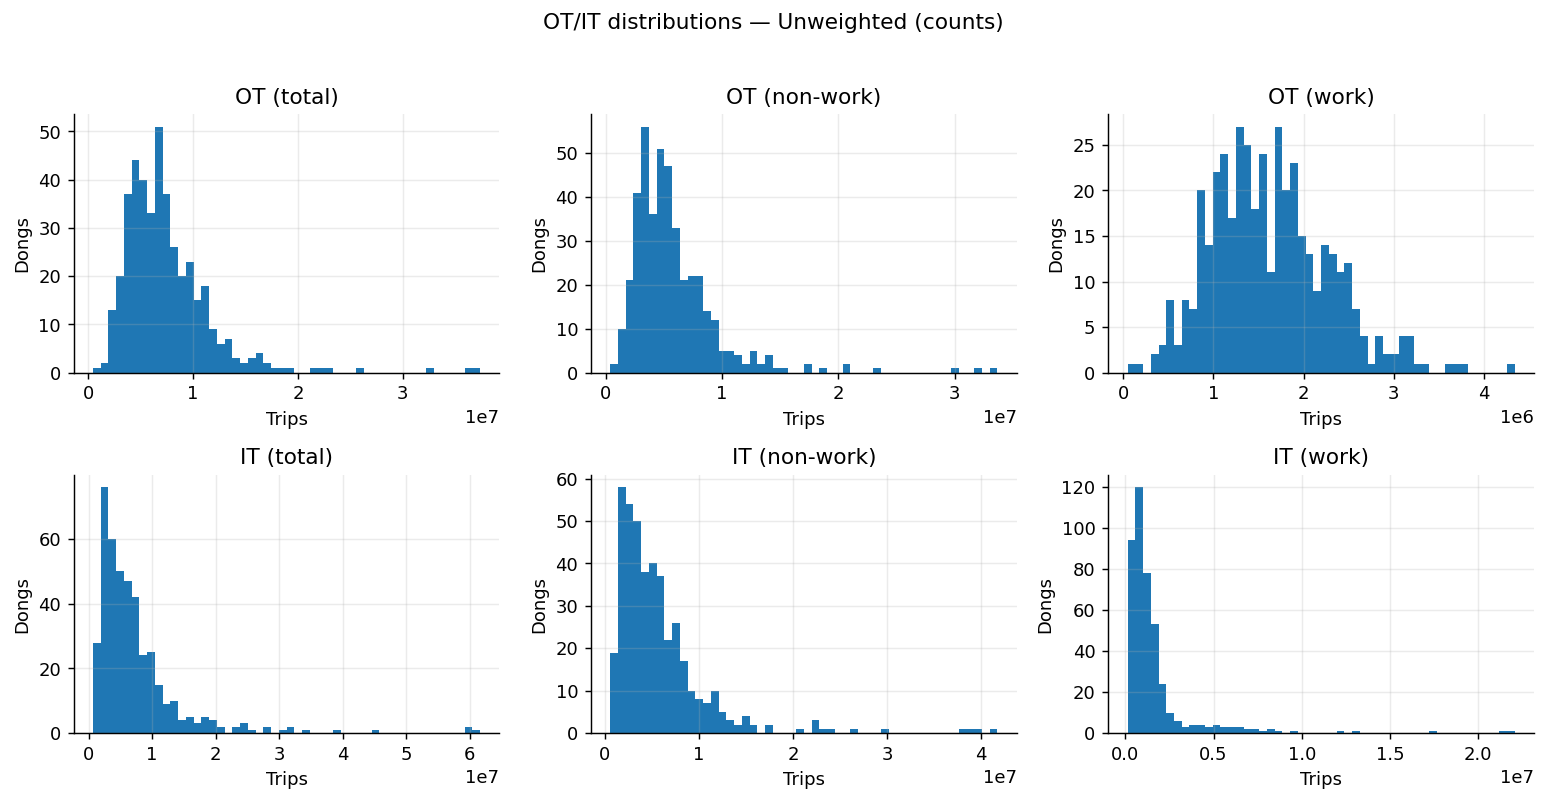

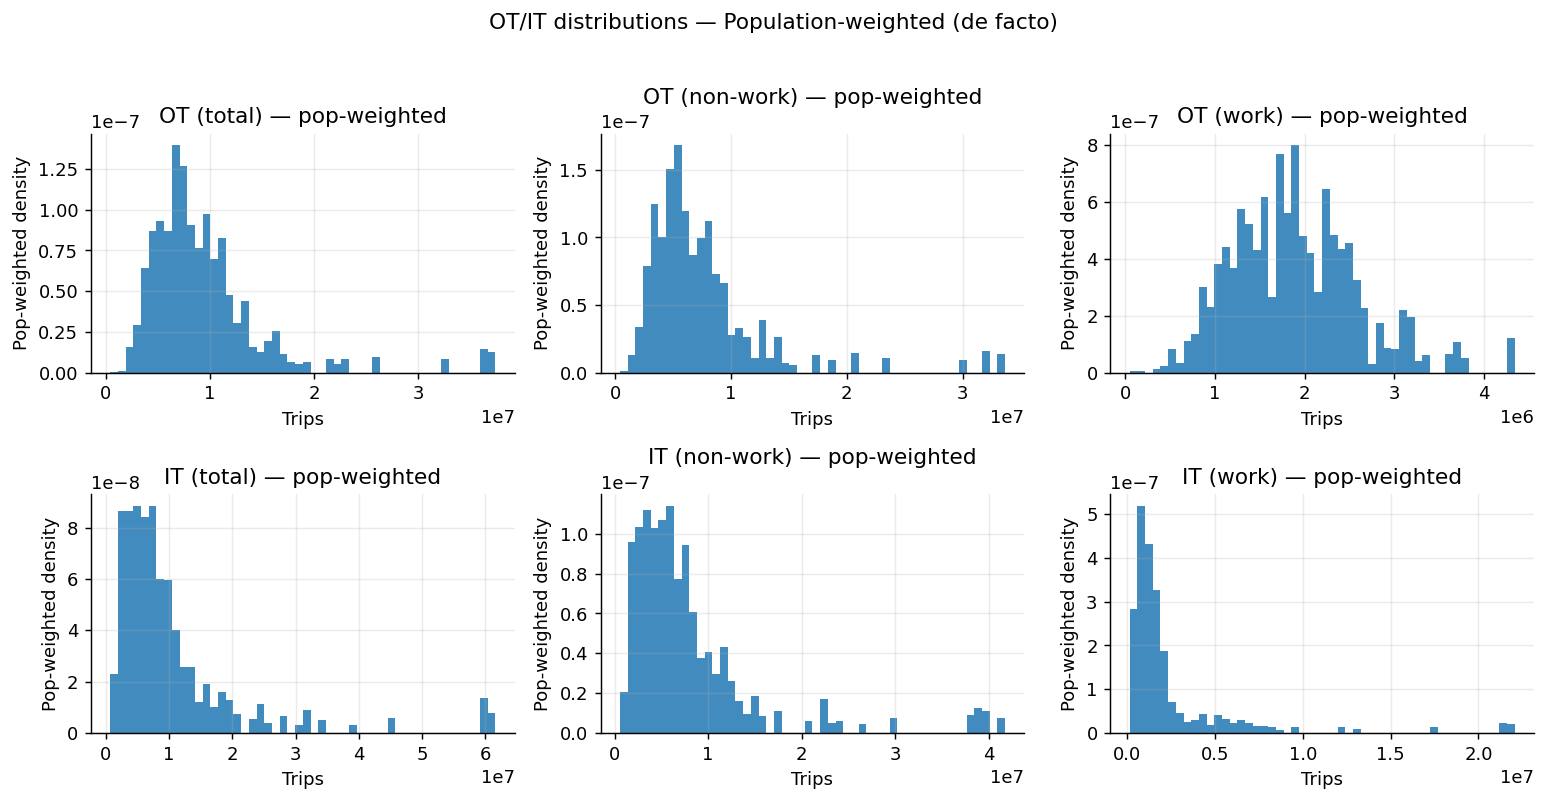

In [5]:
# ============================================
# Cell 4 — OT/IT totals and their distributions
# Cases:
#   - total = work + nonwork
#   - work
#   - nonwork
# Plots:
#   - Unweighted histograms (counts)
#   - Population-weighted histograms (weights = de facto pop)
#     Layout for both: Row 1 = OT (total, nonwork, work),
#                      Row 2 = IT (total, nonwork, work)
# ============================================

# Totals
T_total = T_w + T_nw

def OT_IT_dists(T):
    OT = T.sum(axis=1)
    IT = T.sum(axis=0)
    return OT, IT

OT_tot, IT_tot = OT_IT_dists(T_total)
OT_w , IT_w_  = OT_IT_dists(T_w)
OT_nw, IT_nw_ = OT_IT_dists(T_nw)

df_OT_IT = pd.DataFrame({
    "dong_cd": dong_ids,
    "OT_total": OT_tot, "IT_total": IT_tot,
    "OT_w": OT_w, "IT_w": IT_w_,
    "OT_nw": OT_nw, "IT_nw": IT_nw_
})

print("[Cell 4] Example rows (OT/IT):")
display(df_OT_IT.head())

# -----------------------------
# [NEW] Prepare population weights
# -----------------------------
# Align de facto population with dong_ids
pop_ordered = (
    df_pop.set_index("dong_cd")
          .loc[dong_ids, "defacto_pop"]
          .astype(float)
          .fillna(0.0)
          .clip(lower=0.0)
          .to_numpy()
)  # [NEW]
tot_pop = float(pop_ordered.sum())
if tot_pop <= 0:
    print("[Cell 4][WARN] All de facto populations are zero/NaN; weighted histograms will match unweighted.")  # [NEW]

# -----------------------------
# Unweighted histograms (counts)
# -----------------------------
fig, axs = plt.subplots(2, 3, figsize=(12, 6))  # [NEW layout]
axs = axs  # shape (2,3)

bins = 50

# Row 1: OT (total, non-work, work)
axs[0, 0].hist(OT_tot, bins=bins)
axs[0, 0].set_title("OT (total)")
axs[0, 0].set_xlabel("Trips"); axs[0, 0].set_ylabel("Dongs")

axs[0, 1].hist(OT_nw, bins=bins)
axs[0, 1].set_title("OT (non-work)")
axs[0, 1].set_xlabel("Trips"); axs[0, 1].set_ylabel("Dongs")

axs[0, 2].hist(OT_w, bins=bins)
axs[0, 2].set_title("OT (work)")
axs[0, 2].set_xlabel("Trips"); axs[0, 2].set_ylabel("Dongs")

# Row 2: IT (total, non-work, work)
axs[1, 0].hist(IT_tot, bins=bins)
axs[1, 0].set_title("IT (total)")
axs[1, 0].set_xlabel("Trips"); axs[1, 0].set_ylabel("Dongs")

axs[1, 1].hist(IT_nw_, bins=bins)
axs[1, 1].set_title("IT (non-work)")
axs[1, 1].set_xlabel("Trips"); axs[1, 1].set_ylabel("Dongs")

axs[1, 2].hist(IT_w_, bins=bins)
axs[1, 2].set_title("IT (work)")
axs[1, 2].set_xlabel("Trips"); axs[1, 2].set_ylabel("Dongs")

plt.suptitle("OT/IT distributions — Unweighted (counts)", y=1.02)  # [NEW]
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Population-weighted histograms (density)
# ---------------------------------------------
# Interpretation: each dong contributes proportionally to its de facto population.
if tot_pop > 0:
    fig, axs = plt.subplots(2, 3, figsize=(12, 6))
    bins = 50

    # Row 1: OT (total, non-work, work)
    axs[0, 0].hist(OT_tot, bins=bins, density=True, weights=pop_ordered, alpha=0.85)
    axs[0, 0].set_title("OT (total) — pop-weighted")
    axs[0, 0].set_xlabel("Trips"); axs[0, 0].set_ylabel("Pop-weighted density")

    axs[0, 1].hist(OT_nw, bins=bins, density=True, weights=pop_ordered, alpha=0.85)
    axs[0, 1].set_title("OT (non-work) — pop-weighted")
    axs[0, 1].set_xlabel("Trips"); axs[0, 1].set_ylabel("Pop-weighted density")

    axs[0, 2].hist(OT_w, bins=bins, density=True, weights=pop_ordered, alpha=0.85)
    axs[0, 2].set_title("OT (work) — pop-weighted")
    axs[0, 2].set_xlabel("Trips"); axs[0, 2].set_ylabel("Pop-weighted density")

    # Row 2: IT (total, non-work, work)
    axs[1, 0].hist(IT_tot, bins=bins, density=True, weights=pop_ordered, alpha=0.85)
    axs[1, 0].set_title("IT (total) — pop-weighted")
    axs[1, 0].set_xlabel("Trips"); axs[1, 0].set_ylabel("Pop-weighted density")

    axs[1, 1].hist(IT_nw_, bins=bins, density=True, weights=pop_ordered, alpha=0.85)
    axs[1, 1].set_title("IT (non-work) — pop-weighted")
    axs[1, 1].set_xlabel("Trips"); axs[1, 1].set_ylabel("Pop-weighted density")

    axs[1, 2].hist(IT_w_, bins=bins, density=True, weights=pop_ordered, alpha=0.85)
    axs[1, 2].set_title("IT (work) — pop-weighted")
    axs[1, 2].set_xlabel("Trips"); axs[1, 2].set_ylabel("Pop-weighted density")

    plt.suptitle("OT/IT distributions — Population-weighted (de facto)", y=1.02)  # [NEW]
    plt.tight_layout()
    plt.show()


Extended Data Fig 6.

In [ ]:
# ============================================
# Cell 5 — Weighted histograms + Theory (A,B) as dashed lines in ALL plots
#  - Weighted-only (by de facto population)
#  - SC bins fixed on [0,1] (40 bins)
#  - PE bins fixed on [0, 0.015] (40 bins)  # [PE-ZOOM]
#  - Plots per case (work / non-work):
#      * SC:  (A vs Emp, dashed theory 1/N), (B vs Emp, dashed theory P_i/P),
#              (C γ=1,2,3 vs Emp)
#      * PE:  (A vs Emp, dashed theory 1/N), (B vs Emp, dashed theory P_i/P),
#              (C γ=1,2,3 vs Emp)
#  - EXTRA: dedicated comparison plots — Model B (sim) vs Theory B only (SC & PE)
#  - Quantitative theory checks (WMAE / WRMSE) for A & B
# ============================================

import numpy as np
import matplotlib.pyplot as plt
import os # Added for path manipulation

rng = np.random.default_rng(42)
N_sims = 100
z_thresh = 3.0  # kept for potential outlier work

# Progress
try:
    from tqdm.auto import tqdm
    _USE_TQDM = True
except Exception:
    _USE_TQDM = False

print(f"[Cell 5] Start: N_sims={N_sims}, tqdm={'on' if _USE_TQDM else 'off'}")

# Define output folder for figures
output_folder = "/content/drive/MyDrive/FMC_Data/Combined_Figure"
os.makedirs(output_folder, exist_ok=True)
print(f"[Cell 5] Output figures will be saved to: {output_folder}")

# ----------- Weights (de facto population) -----------
weights_pop = (
    df_pop.set_index("dong_cd")
          .loc[dong_ids, "defacto_pop"]
          .astype(float)
          .fillna(0.0)
          .clip(lower=0.0)
          .to_numpy()
)
W_pop = float(weights_pop.sum())
if W_pop <= 0:
    print("[Cell 5][WARN] All de facto populations are zero/NaN; weighted plots reduce to unweighted.")

# ----------- Helpers -----------
def probs_uniform(n):
    p = np.ones(n, dtype=float); p /= p.sum(); return p

def probs_population(pop):
    p = pop.astype(float).copy()
    if p.sum() <= 0: p = np.ones_like(p)
    p /= p.sum()
    return p

def probs_distance_decay(dist_row, gamma):
    w = np.power(dist_row, -gamma, where=(dist_row > 0), dtype=float)
    w[~np.isfinite(w)] = 0.0
    if w.sum() <= 0: w = np.ones_like(w, dtype=float)
    return w / w.sum()

def simulate_from_OT(OT_vec, P_mat):
    """Per origin i, draw multinomial with probs P_mat[i,:] for n_i=round(OT[i])."""
    n = len(OT_vec)
    T_sim = np.zeros((n, n), dtype=float)
    for i in range(n):
        n_i = int(np.rint(OT_vec[i]))
        if n_i <= 0:
            continue
        draw = rng.multinomial(n_i, P_mat[i], size=1)[0]
        T_sim[i, :] = draw
    return T_sim

def summarize_SC_PE_over_sims(T_emp, P_mat, N_sims, label=""):
    """Run sims; return per-dong SC/PE means & stds."""
    n = T_emp.shape[0]
    OT_emp = T_emp.sum(axis=1)
    SC_sims = np.zeros((N_sims, n), dtype=float)
    PE_sims = np.zeros((N_sims, n), dtype=float)

    if _USE_TQDM:
        it = tqdm(range(N_sims), desc=f"[Cell 5] {label}", leave=False)
    else:
        it = range(N_sims)
        print_every = max(1, N_sims // 10)
        print(f"[Cell 5] {label}: running {N_sims} sims...")

    for s in it:
        T_sim = simulate_from_OT(OT_emp, P_mat)
        SC_s, _ = compute_SC(T_sim)
        PE_s, _, _ = compute_PE(T_sim)
        SC_sims[s, :] = SC_s
        PE_sims[s, :] = PE_s
        if not _USE_TQDM and ((s + 1) % print_every == 0 or s == N_sims - 1):
            print(f"[Cell 5] {label}: {s+1}/{N_sims} sims")

    stats = {
        "SC_mean": SC_sims.mean(axis=0),
        "SC_std":  SC_sims.std(axis=0, ddof=1),
        "PE_mean": PE_sims.mean(axis=0),
        "PE_std":  PE_sims.std(axis=0, ddof=1),
    }
    return stats

def _finite(x):
    x = np.asarray(x)
    return x[np.isfinite(x)]

def _summ(v):
    v = _finite(v)
    return "no finite values" if v.size == 0 else f"min={v.min():.4f}, max={v.max():.4f}, n={v.size}"

# ----------- Build probability matrices -----------
n = len(dong_ids)
P_A = np.tile(probs_uniform(n), (n, 1))
P_B = np.tile(probs_population(weights_pop), (n, 1))

def build_P_distance_gamma(dist_matrix, gamma):
    P = np.zeros_like(dist_matrix, dtype=float)
    for i in range(n):
        P[i, :] = probs_distance_decay(dist_matrix[i, :], gamma)
    return P
gammas = [1, 2, 3]
P_C = {g: build_P_distance_gamma(dist_matrix, g) for g in gammas}

# ----------- Empirical vectors -----------
SC_emp = {"work": SC_w, "nonwork": SC_nw}
PE_emp = {"work": PE_w, "nonwork": PE_nw}
T_emp_map = {"work": T_w, "nonwork": T_nw}

print(f"[Cell 5] Empirical SC (work):     {_summ(SC_emp['work'])}")
print(f"[Cell 5] Empirical SC (nonwork): {_summ(SC_emp['nonwork'])}")
print(f"[Cell 5] Empirical PE (work):     {_summ(PE_emp['work'])}")
print(f"[Cell 5] Empirical PE (nonwork): {_summ(PE_emp['nonwork'])}")

# ----------- Run models -----------
results = {}  # results[(model, case)] = dict(stats)

def run_model(label, P):
    for case in ("work", "nonwork"):
        stats = summarize_SC_PE_over_sims(T_emp_map[case], P, N_sims, label=f"{label} | {case}")
        results[(label, case)] = {"stats": stats}

run_model("A_uniform", P_A)
run_model("B_pop", P_B)
for g in gammas:
    run_model(f"C_dist_gamma{g}", P_C[g])

print("[Cell 5] Simulations complete. Preparing weighted plots + theory overlays...")

# ----------- Fixed bins/ranges -----------
SC_BINS = np.linspace(0.0, 1.0, 41)  # 40 bins

# ---- PE fixed zoom (requested) ----
PE_XMAX = 0.015                            # [PE-ZOOM] fixed right edge for all PE histograms
PE_NBINS = 40                              # [PE-ZOOM]
PE_BINS_FIXED = np.linspace(0.0, PE_XMAX, PE_NBINS + 1)  # [PE-ZOOM]

# ----------- Theory vectors -----------
theory_A_val = 1.0 / n                         # SC=PE=1/N  (Model A)
theory_B_vec = (weights_pop / W_pop) if W_pop > 0 else np.zeros(n)  # SC=PE=P_i/P  (Model B)

def weighted_metrics(sim, theory, w):
    w = np.asarray(w, dtype=float)
    err = sim - theory
    W = w.sum() if w.sum() > 0 else 1.0
    wmae  = float((np.abs(err) * w).sum() / W)
    wrmse = float(np.sqrt(((err ** 2) * w).sum() / W))
    max_abs_idx = int(np.argmax(np.abs(err)))
    return wmae, wrmse, max_abs_idx, float(err[max_abs_idx])

# ----------- Plotting (WEIGHTED ONLY) -----------
def hist_weighted(ax, data, bins, weights, label, alpha=0.55, histtype='bar'):
    ax.hist(_finite(data), bins=bins, density=True, weights=weights, alpha=alpha, label=label, histtype=histtype)

def plot_theoryB_dashed(ax, bins, weights, label="Theory B (P_i/P)"):
    # draw as dashed step line (line-only), population-weighted
    ax.hist(theory_B_vec, bins=bins, density=True, weights=weights, histtype='step', linestyle='--', linewidth=1.8, label=label)

def plot_case_weighted(case):
    # ===== SC (3 panels): A vs Emp (dashed theory 1/N), B vs Emp (dashed theory P_i/P), C γ=1,2,3 vs Emp =====
    fig_sc, axs = plt.subplots(1, 3, figsize=(14, 3.8), sharey=True)

    # Panel 1: A vs Emp + dashed vertical theory line at 1/N
    hist_weighted(axs[0], SC_emp[case], SC_BINS, weights_pop, "Empirical", alpha=0.55)
    hist_weighted(axs[0], results[("A_uniform", case)]["stats"]["SC_mean"], SC_BINS, weights_pop, "Model A (sim)", alpha=0.45)
    axs[0].axvline(theory_A_val, linestyle="--", linewidth=1.8, label="Theory A (1/N)")
    axs[0].set_title(f"SC — {case}: Model A vs Emp"); axs[0].set_xlabel("SC"); axs[0].set_ylabel("Pop-weighted density"); axs[0].legend()

    # Panel 2: B vs Emp + dashed theory line (distribution of P_i/P)
    hist_weighted(axs[1], SC_emp[case], SC_BINS, weights_pop, "Empirical", alpha=0.55)
    hist_weighted(axs[1], results[("B_pop", case)]["stats"]["SC_mean"], SC_BINS, weights_pop, "Model B (sim)", alpha=0.45)
    plot_theoryB_dashed(axs[1], SC_BINS, weights_pop)
    axs[1].set_title(f"SC — {case}: Model B vs Emp"); axs[1].set_xlabel("SC"); axs[1].legend()

    # Panel 3: C γ=1,2,3 vs Emp (no theory available)
    hist_weighted(axs[2], SC_emp[case], SC_BINS, weights_pop, "Empirical", alpha=0.50)
    for g in gammas:
        hist_weighted(axs[2], results[(f"C_dist_gamma{g}", case)]["stats"]["SC_mean"], SC_BINS, weights_pop, f"Model C γ={g}", alpha=0.40)
    axs[2].set_title(f"SC — {case}: Model C (γ=1,2,3) vs Emp"); axs[2].set_xlabel("SC"); axs[2].legend()

    plt.tight_layout()
    fig_sc.savefig(os.path.join(output_folder, f"SC_{case}_models_comparison.jpg"), dpi=300) # Save figure
    plt.show()

    # ===== PE (3 panels): A vs Emp (dashed theory 1/N), B vs Emp (dashed theory P_i/P), C γ=1,2,3 vs Emp =====
    PE_BINS = PE_BINS_FIXED  # [PE-ZOOM] use fixed bins for all PE panels
    fig_pe, axs = plt.subplots(1, 3, figsize=(14, 3.8), sharey=True)

    # Panel 1: A vs Emp + dashed vertical theory line at 1/N
    hist_weighted(axs[0], PE_emp[case], PE_BINS, weights_pop, "Empirical", alpha=0.55)
    hist_weighted(axs[0], results[("A_uniform", case)]["stats"]["PE_mean"], PE_BINS, weights_pop, "Model A (sim)", alpha=0.45)
    axs[0].axvline(theory_A_val, linestyle="--", linewidth=1.8, label="Theory A (1/N)")
    axs[0].set_title(f"PE — {case}: Model A vs Emp"); axs[0].set_xlabel("PE"); axs[0].set_ylabel("Pop-weighted density"); axs[0].legend()
    axs[0].set_xlim(0, PE_XMAX)  # [PE-ZOOM]

    # Panel 2: B vs Emp + dashed theory line (distribution of P_i/P)
    hist_weighted(axs[1], PE_emp[case], PE_BINS, weights_pop, "Empirical", alpha=0.55)
    hist_weighted(axs[1], results[("B_pop", case)]["stats"]["PE_mean"], PE_BINS, weights_pop, "Model B (sim)", alpha=0.45)
    plot_theoryB_dashed(axs[1], PE_BINS, weights_pop)
    axs[1].set_title(f"PE — {case}: Model B vs Emp"); axs[1].set_xlabel("PE"); axs[1].legend()
    axs[1].set_xlim(0, PE_XMAX)  # [PE-ZOOM]

    # Panel 3: C γ=1,2,3 vs Emp (no theory available)
    hist_weighted(axs[2], PE_emp[case], PE_BINS, weights_pop, "Empirical", alpha=0.50)
    for g in gammas:
        hist_weighted(axs[2], results[(f"C_dist_gamma{g}", case)]["stats"]["PE_mean"], PE_BINS, weights_pop, f"Model C γ={g}", alpha=0.40)
    axs[2].set_title(f"PE — {case}: Model C (γ=1,2,3) vs Emp"); axs[2].set_xlabel("PE"); axs[2].legend()
    axs[2].set_xlim(0, PE_XMAX)  # [PE-ZOOM]

    plt.tight_layout()
    fig_pe.savefig(os.path.join(output_folder, f"PE_{case}_models_comparison.jpg"), dpi=300) # Save figure
    plt.show()

for case in ("work", "nonwork"):
    plot_case_weighted(case)

# ----------- EXTRA: Focused plots — Model B (sim) vs Theory B ONLY -----------
def plot_modelB_only(case):
    # SC and PE side-by-side, both as step lines (sim solid, theory dashed), weighted
    PE_BINS = PE_BINS_FIXED  # [PE-ZOOM]
    fig, axs = plt.subplots(1, 2, figsize=(12, 3.8), sharey=False)

    # SC: sim vs theory
    axs[0].hist(results[("B_pop", case)]["stats"]["SC_mean"], bins=SC_BINS, density=True, weights=weights_pop,
                histtype='step', linewidth=1.8, label="Model B (sim)")
    axs[0].hist(theory_B_vec, bins=SC_BINS, density=True, weights=weights_pop,
                histtype='step', linestyle='--', linewidth=1.8, label="Theory B (P_i/P)")
    axs[0].set_title(f"SC — {case}: Model B vs Theory (pop-weighted)")
    axs[0].set_xlabel("SC"); axs[0].set_ylabel("Pop-weighted density"); axs[0].legend()

    # PE: sim vs theory (zoomed)
    axs[1].hist(results[("B_pop", case)]["stats"]["PE_mean"], bins=PE_BINS, density=True, weights=weights_pop,
                histtype='step', linewidth=1.8, label="Model B (sim)")
    axs[1].hist(theory_B_vec, bins=PE_BINS, density=True, weights=weights_pop,
                histtype='step', linestyle='--', linewidth=1.8, label="Theory B (P_i/P)")
    axs[1].set_title(f"PE — {case}: Model B vs Theory (pop-weighted)")
    axs[1].set_xlabel("PE"); axs[1].legend()
    axs[1].set_xlim(0, PE_XMAX)  # [PE-ZOOM]

    plt.tight_layout()
    fig.savefig(os.path.join(output_folder, f"ModelB_only_{case}.jpg"), dpi=300) # Save figure
    plt.show()

for case in ("work", "nonwork"):
    plot_modelB_only(case)

# ----------- Quantitative theory checks for Models A & B -----------
def weighted_metrics(sim, theory, w):
    w = np.asarray(w, dtype=float)
    err = sim - theory
    W = w.sum() if w.sum() > 0 else 1.0
    wmae  = float((np.abs(err) * w).sum() / W)
    wrmse = float(np.sqrt(((err ** 2) * w).sum() / W))
    max_abs_idx = int(np.argmax(np.abs(err)))
    return wmae, wrmse, max_abs_idx, float(err[max_abs_idx])

def print_theory_checks(case):
    print(f"\n[Cell 5] Theory checks — {case}")
    simA_SC = results[("A_uniform", case)]["stats"]["SC_mean"]
    simA_PE = results[("A_uniform", case)]["stats"]["PE_mean"]
    simB_SC = results[("B_pop", case)]["stats"]["SC_mean"]
    simB_PE = results[("B_pop", case)]["stats"]["PE_mean"]

    # Model A vs theory 1/N
    theory_A_vec = np.full(n, theory_A_val, dtype=float)
    wmae_SC_A, wrmse_SC_A, idxA_SC, errA_SC = weighted_metrics(simA_SC, theory_A_vec, weights_pop)
    wmae_PE_A, wrmse_PE_A, idxA_PE, errA_PE = weighted_metrics(simA_PE, theory_A_vec, weights_pop)
    print(f"  Model A (SC): WMAE={wmae_SC_A:.6f}, WRMSE={wrmse_SC_A:.6f}, max|err| at {dong_ids[idxA_SC]} ({errA_SC:+.6f})")
    print(f"  Model A (PE): WMAE={wmae_PE_A:.6f}, WRMSE={wrmse_PE_A:.6f}, max|err| at {dong_ids[idxA_PE]} ({errA_PE:+.6f})")

    # Model B vs theory P_i/P
    wmae_SC_B, wrmse_SC_B, idxB_SC, errB_SC = weighted_metrics(simB_SC, theory_B_vec, weights_pop)
    wmae_PE_B, wrmse_PE_B, idxB_PE, errB_PE = weighted_metrics(simB_PE, theory_B_vec, weights_pop)
    print(f"  Model B (SC): WMAE={wmae_SC_B:.6f}, WRMSE={wrmse_SC_B:.6f}, max|err| at {dong_ids[idxB_SC]} ({errB_SC:+.6f})")
    print(f"  Model B (PE): WMAE={wmae_PE_B:.6f}, WRMSE={wrmse_PE_B:.6f}, max|err| at {dong_ids[idxB_PE]} ({errB_PE:+.6f})")

for case in ("work", "nonwork"):
    print_theory_checks(case)


# ----------------- end of code ---------------------